Spending by Category:
Food: 91200
Transportation: 36480
Rent: 271840
Total Spent: 399520


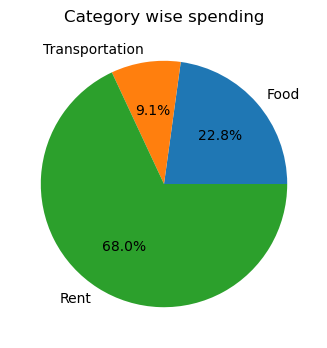

In [5]:
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt

class ExpenseTracker:
    def __init__(self, filename='expenses.json'):
        self.filename = filename
        self.expenses = []
        self.load_data()

    def load_data(self):
            with open(self.filename, 'r') as file:
                self.expenses = json.load(file)

    def save_data(self):
        with open(self.filename, 'w') as file:
            json.dump(self.expenses, file)

    def add_expense(self, date, category, amount, description=''):
        expense = {
            'date': date,
            'category': category,
            'amount': amount,
            'description': description
        }
        self.expenses.append(expense)
        self.save_data()

    def delete_expense(self, index): 
            del self.expenses[index]
            self.save_data()

    def get_summary(self):
        total_spent = sum(expense['amount'] for expense in self.expenses)
        print(f"Total Spent: {total_spent}")
        return total_spent

    def get_monthly_report(self, month, year):
        monthly_expenses = [expense for expense in self.expenses 
                            if datetime.strptime(expense['date'], '%Y-%m-%d').month == month 
                            and datetime.strptime(expense['date'], '%Y-%m-%d').year == year]
        total_spent = sum(expense['amount'] for expense in monthly_expenses)
        
        print(f"Monthly Total for {month}/{year}: {total_spent}")
        print("Monthly Expenses:")
        for expense in monthly_expenses:
            print(expense)
    
        return total_spent, monthly_expenses

    def categorize_expenses(self):
        categories = {}
        for expense in self.expenses:
            category = expense['category']
            categories[category] = categories.get(category, 0) + expense['amount']
        
        return categories

    def print_categories(self):
        categories = self.categorize_expenses()
        print("Spending by Category:")
        for category, total in categories.items():
            print(f"{category}: {total}")

    def visualize_expenses(self):
        categories = self.categorize_expenses()
        plt.figure(figsize=(8, 4))
        plt.pie(categories.values(), labels=categories.keys(), autopct='%1.1f%%')
        plt.title('Category wise spending')
        plt.show()

tracker = ExpenseTracker()
tracker.add_expense('2024-12-10', 'Food', 5000, 'Groceries')
tracker.add_expense('2024-12-12', 'Transportation', 2000, 'Bus fare')
tracker.add_expense('2024-12-11', 'Rent', 15000, 'House')
tracker.print_categories()
tracker.get_summary()
tracker.visualize_expenses()
